# <span style="color:dark green"><center>TRATAMIENTO DE DATOS MASIVOS DE CONTENIDO BIOTECNOLÓGICO</center>  
    
## <span style="color:black"><center>*"Programación en Python: Aplicación a la Bioinformática"*</center>
        
<center> Autora: Marta Barea Sepúlveda </center> <center> Curso Académico: 2018 - 2019 </center> 
    
    



## Resúmen
***
<p style="text-align: justify;"> La bioinformática es la aplicación de métodos computacionales al análisis de datos biológicos para poder contestar numerosas preguntas. Las tecnologías computacionales permiten, entre otras cosas, el análisis en plazos cortos de gran cantidad de datos, así como la predicción de la forma o la función de las distintas unidades biológicas, o la simulación del comportamiento de sistemas biológicos complejos.</p>
    
<p style="text-align: justify;"> En este trabajo se propone diseñar un programa que permita analizar y estudiar secuencias de nucleótidos y aminoácidos. Para ello, se empleará como lenguaje de programación Python.</p>


## Índice
***
**1. Análisis bioinformático de secuencias de nucleótidos**

   1.1. Secuencia de nucleótidos ejemplo
   
   1.2. Aplicación de la Ley de Chargaff
   
       1.2.1.Establecimiento del número y porcentaje de nucleótidos en una secuencia de ADN
       
       1.2.2.Contenido GC y AT

   1.3. Obtención de la cadena complementaria y antiparalela de la secuencia de nucleótido
   
   1.4. Determinación de puntos de diferencia entre secuencias complementarias y antiparalelas usando la distancia de Hamming

***
**2. De la secuencia de nucleótidos a la secuencia de aminoácidos**

   2.1. Transcripción: Del ADN al ARNm
   
   2.2. Traducción de secuencia de nucleótidos a secuencia de aminoácidos
   
   2.3. Parámetros fisicoquímicos de la cadena polipeptídica: Uso de Biopython
   
       2.3.1. Establecimiento de la secuencia de aminoácidos
       
       2.3.2. Cálculo de propiedades de la secuencia de aminoácidos
       
       2.3.3. Gráfico del índice de hidrofobicidad de la secuencia de aminoácidos


## 1. Análisis bioinformático de secuencias de nucleótidos
***


###  1.1. Secuencia de nucleótidos ejemplo
*** 
<p style="text-align: justify;"> Se ha diseñado un script que permita extraer información de secuencias de nucleótidos y cuyo funcionamiento no esté restringido a una secuencia concreta. De esta forma el usuario podrá introducir la secuencia que desee y trabajar con ella. Sin embargo, con el fin de ver el funcionamiento del código, se propone como secuencia ejemplo la secuencia de nucleótidos que codifica el gen que expresa la proteína estearoil-CoA en la especie Seriola lalandi dorsalis:</p>
    


In [14]:
#Establecimiento de la variable DNA que contiene la secuencia ejemplo.
DNA ="GGATCCGATGACAGAGGCGGAGGCGTTGGAGAAGAAGCAGCACAAGCCCAGCAACGGGAATGCTCTACCAGAGGCCACCAGAGAAGACGTGTTTGATCACACATACAAAGAGAAAGAGGGCCCCAAACCTGCCACGATCATCGTATGGAAAAATGTCTTATTGATGACTCTATTGCATTTAGCTGCCCTGTACGCCGTGTCCATCGTCCCTTCCGCATCTATTTTGACCTTGCTTTGGTCCGCACTTTGTTTTTTGATAAGTGCTTTAGGAATTACTGCAGGGGCTCATCGTCTGTGGAGTCACAGATCCTACAAGGCCTCACTACCTCTAAGGATCTTTCTTGGTTTTGCTAACTCCATGGCATTTCAGAATGATATCTTTGAATGGGCTCGAGACCACAGGGTCCACCACAAATATTCAGAGACAGATGCTGACCCCCACAACGCCGTGCGGGGCTTCTTTTTCGCTCACATCGGGTGGCTGCTGGTGCGCAAACACCCTGACGTCATTGAGAAAGGGCGCAAGCTTGAGCTCAATGACCTGCTGGCTGACAAAGTTGTAATGTTTCAAAGGAAGTATTACAAGCCGTCTGTGCTGCTCATGTGCTTCTTCGTCCCCATGTTCGTGCCTTGGTACATGTGGGGAGAGTCTCTGTGGGTGGCGTACTTCATCCCGGCAGTGCTGAGGTACACCATGGTCCTGAACGCCACCTGGCTGGTCAACAGCGCGGCTCACATGTGGGGAAACAGGCCCTATGACAAGAACATCAACCCCAGGGAGAACAAGTTTGTCGCGTTCAGCGCTATAGGTGAGGGATTTCACAATTATCACCACTCTTTCCCCTATGACTATGCAACCAGCGAGTTTGGCTGCAAGTTGAACCTTACCACTTGTTTCATCGACTTCATGTGCTTCTTGGGCCTGGCGAAGGACTGCAAGAGAGTGTCCAACGAGATGGTCATGGCCCGAATACAGCGCACCGGAGACGGAAGCCACCGGAGTGGCTAAGATTGTTGAATG"
#impresión de la variable con un texto descriptivo. 
print("\033[1mLa secuencia de nucleótidos problema es:\x1b[0m", DNA)
#Establecimiento del comando %matplotlib inline para poder establecer gráficos a lo largo del script. 
%matplotlib inline

La secuencia de nucleótidos problema es: GGATCCGATGACAGAGGCGGAGGCGTTGGAGAAGAAGCAGCACAAGCCCAGCAACGGGAATGCTCTACCAGAGGCCACCAGAGAAGACGTGTTTGATCACACATACAAAGAGAAAGAGGGCCCCAAACCTGCCACGATCATCGTATGGAAAAATGTCTTATTGATGACTCTATTGCATTTAGCTGCCCTGTACGCCGTGTCCATCGTCCCTTCCGCATCTATTTTGACCTTGCTTTGGTCCGCACTTTGTTTTTTGATAAGTGCTTTAGGAATTACTGCAGGGGCTCATCGTCTGTGGAGTCACAGATCCTACAAGGCCTCACTACCTCTAAGGATCTTTCTTGGTTTTGCTAACTCCATGGCATTTCAGAATGATATCTTTGAATGGGCTCGAGACCACAGGGTCCACCACAAATATTCAGAGACAGATGCTGACCCCCACAACGCCGTGCGGGGCTTCTTTTTCGCTCACATCGGGTGGCTGCTGGTGCGCAAACACCCTGACGTCATTGAGAAAGGGCGCAAGCTTGAGCTCAATGACCTGCTGGCTGACAAAGTTGTAATGTTTCAAAGGAAGTATTACAAGCCGTCTGTGCTGCTCATGTGCTTCTTCGTCCCCATGTTCGTGCCTTGGTACATGTGGGGAGAGTCTCTGTGGGTGGCGTACTTCATCCCGGCAGTGCTGAGGTACACCATGGTCCTGAACGCCACCTGGCTGGTCAACAGCGCGGCTCACATGTGGGGAAACAGGCCCTATGACAAGAACATCAACCCCAGGGAGAACAAGTTTGTCGCGTTCAGCGCTATAGGTGAGGGATTTCACAATTATCACCACTCTTTCCCCTATGACTATGCAACCAGCGAGTTTGGCTGCAAGTTGAACCTTACCACTTGTTTCATCGACTTCATGTGCTTCTTGGGCCTGGCGAAGGACTGCAAGAGAGTGTCCAACGAGATGG

###  1.2. Aplicación de la Ley de Chargaff 
***
<p style="text-align: justify;">La Ley de Chargaff se basa en la relación cuantitativa de los nucleótidos que forman la doble hélice del ADN.
Establece que la cantidad de Adenina(A) es igual a la cantidad de Timina(T), y la cantidad de Guanina(G) es igual a la cantidad de Citosina(C). Es decir, el n° total de bases purinas es igual al n° total de bases pirimídinas(A+G= C+T). Las reglas de Chargaff y Col son aplicables solamente a la molécula de ADN y no al ARN, porque el ARN está formado por una secuencia lineal o de hélice simple de nucleótidos y por no poseer Timina, en su lugar posee Uracilo.</p>

####  1.2.1. Establecimiento del número y porcentaje de nucleótidos en una secuencia de ADN
***

<p style="text-align: justify;">En primer lugar, se determina el contenido de adenina, guanina, timina y citosina en la secuencia de nucleótidos deseada:</p>

#### (!) Nota para el usuario: 
<p style="text-align: justify;">Si no desea introducir una secuencia de nucleótidos y desea que el programa trabaje con la secuencia ejemplo, cuando salte la ventana "Por favor, introduzca su secuencia de nucleótidos abajo:" pulse INTRO y el programa la seleccionará por defecto.
Este comentario es válido para el resto de códigos de aquí en adelante.</p>

In [15]:
#Establecimiento de variable DNA_TMP que contenga la función input. El usuario podrá introducir la secuencia de ADN.
DNA_TMP = input("\033[1mPor favor, introduzca su secuencia de nucleótidos abajo:\n\x1b[0m")
#Este condicional indica que si el usuario rellena la variable DNA_TMP entonces el valor de DNA se modifica. 
if DNA_TMP != '':
    DNA = DNA_TMP
#Se definen cuatro variables correspondientes al conteo de nucleótidos y se aplica la función count.
A = DNA.count("A")
G = DNA.count("G")
C = DNA.count("C")
T = DNA.count("T")
#Se imprime el resultado del conteo.
print("\033[1mEl número de A en su secuencia de nucleótidos es:\x1b[0m", A)
print("\033[1mEl número de G en su secuencia de nucleótidos es:\x1b[0m", G)
print("\033[1mEl número de C en su secuencia de nucleótidos es:\x1b[0m", C)
print("\033[1mEl número de T en su secuencia de nucleótidos es:\x1b[0m", T)


Por favor, introduzca su secuencia de nucleótidos abajo:

El número de A en su secuencia de nucleótidos es: 245
El número de G en su secuencia de nucleótidos es: 265
El número de C en su secuencia de nucleótidos es: 259
El número de T en su secuencia de nucleótidos es: 252



<p style="text-align: justify;">El resultado obtenido se puede expresar en porcentajes:</p>

In [16]:
#Expresión de los resultados del input anterior en porcentajes.
#La función format permite que el resultado se de con 3 cifras decimales. 
print("\033[1mEl porcentaje de A en su secuencia de nucleótidos es:\x1b[0m","{0:.3f}".format((A/(A+G+C+T)*100.0)),("%"))
print("\033[1mEl porcentaje de G en su secuencia de nucleótidos es:\x1b[0m","{0:.3f}".format((G/(A+G+C+T)*100.0)),("%"))
print("\033[1mEl porcentaje de C en su secuencia de nucleótidos es:\x1b[0m","{0:.3f}".format((C/(A+G+C+T)*100.0)),("%"))
print("\033[1mEl porcentaje de T en su secuencia de nucleótidos es:\x1b[0m","{0:.3f}".format((T/(A+G+C+T)*100.0)),("%"))

El porcentaje de A en su secuencia de nucleótidos es: 23.996 %
El porcentaje de G en su secuencia de nucleótidos es: 25.955 %
El porcentaje de C en su secuencia de nucleótidos es: 25.367 %
El porcentaje de T en su secuencia de nucleótidos es: 24.682 %


Además, se puede expresar de forma visual estableciendo un gráfico de sectores: 

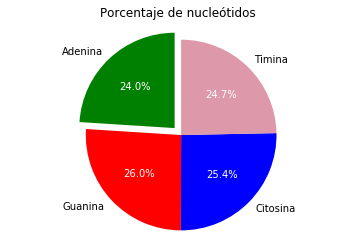

In [17]:
#Importando pyplot de la libreria matplotlib.
#Gráfico de sectores.
from matplotlib import pyplot

#Definición de la variable nucleótidos; contiene la leyenda del gráfico.
nucleotidos = ('Adenina', 'Guanina', 'Citosina', 'Timina')
#Definición de los valores de cada sector del gráfico.
slices = ((A/(A+G+C+T)*100.0), (G/(A+G+C+T)*100.0), (C/(A+G+C+T)*100.0), (T/(A+G+C+T)*100.0))
#Etiqueta de color de cada sector del gráfico.
colores = ('green','red','blue','#DD98AA','#18492D')
#Valores para resaltar el sector de la Adenina en el gráfico.
valores = (0.1, 0, 0, 0)
#La función pyplot.pie devuelve tres valores, de los cuales dos son ignorados (por eso se han definido como _) y
#el último valor devuelto permite cambiar el color del texto dentro del gráfico.
_, _, texto = pyplot.pie(slices, colors=colores, labels=nucleotidos, autopct='%1.1f%%', 
                         explode=valores, startangle=90)
                        
#Búcle para establecer el color interno de cada sector.
for tex in texto:
    tex.set_color('white')

pyplot.axis('equal')
pyplot.title('Porcentaje de nucleótidos')
#pyplot.legend(labels=nucleotidos)

#Mostrar grafico.
pyplot.show()

####  1.2.2. Contenido GC y AT
***
<p style="text-align: justify;"> El contenido GC, expresado generalmente como porcentaje, representa la cantidad de pares Guanina-Citosina en la molécula de ADN que está siendo investigada. Por su parte, el contenido AT representa la cantidad de pares de Adenina-Timina en la molécula de ADN.</p> 

<p style="text-align: justify;">El contenido GC es el parámetro que interesa porque los genes se suelen caracterizar por un contenido de GC mayor en comparación con el resto del genoma. En concreto, los exones son las secuencias que presentan un elevado contenido de GC, mientras que los intrones presentan un contenido superior en AT.</p>


In [18]:
#Se realiza un print del % de GC y AC, empleando las variables definidas en el input 2.
print("\033[1mEl contenido GC en su secuencia de nucleótidos es:\x1b[0m","{0:.3f}".format(((G+C)/(A+G+C+T)*100.0)),("%"))
print("\033[1mEl contenido AT en su secuencia de nucleótidos es:\x1b[0m","{0:.3f}".format(((A+T)/(A+G+C+T)*100.0)),("%"))

El contenido GC en su secuencia de nucleótidos es: 51.322 %
El contenido AT en su secuencia de nucleótidos es: 48.678 %


### 1.3. Obtención de la cadena complementaria y antiparalela de la secuencia de nucleótidos
***
<p style="text-align: justify;">El ADN está constituido por dos cadenas de nucleótidos complementarias y antiparalelas. Es decir, las secuencias de ADN de doble hélice están representadas por la secuencia de nucleótidos de la cadena superior y la secuencia de la cadena de nucleótidos inferior. La cadena de la secuencia superior va en el sentido de su extremo 5'a 3' y, la cadena inferior, es complementaria (donde había A en la cadena superior ahora hay T) y antiparalela (3' a 5') es la secuencia de la cadena inferior.</p>

<p style="text-align: justify;"> Siguiendo el criterio de la complementariedad de bases (A-T; G-C), el usuario puede obtener la cadena de nucleótidos complementaria y antiparalela a la secuencia objeto de estudio: </p>


In [19]:
#Establecimiento de variable DNA_TMP que contenga la función input. El usuario podrá introducir la secuencia de ADN.
DNA_TMP = input("\033[1mPor favor, introduzca su secuencia de nucleótidos abajo:\n\x1b[0m")
#Este condicional indica que si el usuario rellena la variable DNA_TMP entonces el valor de DNA se modifica. 
if DNA_TMP != '':
    DNA = DNA_TMP
#Definición de variable DNA_upper; evita que el usuario introduzca valores en minúscula.   
DNA_upper=DNA.upper()
#Definición de la variable DNA_upper_reversed; secuencia antiparalela. 
#El orden de DNA_upper se invierte aplicando 
DNA_upper_reversed=DNA_upper[::-1]

print ("\033[1mLa secuencia de nucleótidos complementaria y antiparalela es:\x1b[0m")
DNA_COMP = ''

#Establecimiento del diccionario que remplazará los nucleótidos para la cadena complementaria y antiparalela.
DICT_REPLACE = {'A' : 'T', 'T' : 'A', 'G' : 'C', 'C' : 'G'}
#Bucle que va a remplazar los nucleótidos de DNA_upper_reversed según el diccionario; y se crea DNA_COMP.
for i in DNA_upper_reversed:
    DNA_COMP += DICT_REPLACE[i]
   
print(DNA_COMP)

Por favor, introduzca su secuencia de nucleótidos abajo:

La secuencia de nucleótidos complementaria y antiparalela es:
CATTCAACAATCTTAGCCACTCCGGTGGCTTCCGTCTCCGGTGCGCTGTATTCGGGCCATGACCATCTCGTTGGACACTCTCTTGCAGTCCTTCGCCAGGCCCAAGAAGCACATGAAGTCGATGAAACAAGTGGTAAGGTTCAACTTGCAGCCAAACTCGCTGGTTGCATAGTCATAGGGGAAAGAGTGGTGATAATTGTGAAATCCCTCACCTATAGCGCTGAACGCGACAAACTTGTTCTCCCTGGGGTTGATGTTCTTGTCATAGGGCCTGTTTCCCCACATGTGAGCCGCGCTGTTGACCAGCCAGGTGGCGTTCAGGACCATGGTGTACCTCAGCACTGCCGGGATGAAGTACGCCACCCACAGAGACTCTCCCCACATGTACCAAGGCACGAACATGGGGACGAAGAAGCACATGAGCAGCACAGACGGCTTGTAATACTTCCTTTGAAACATTACAACTTTGTCAGCCAGCAGGTCATTGAGCTCAAGCTTGCGCCCTTTCTCAATGACGTCAGGGTGTTTGCGCACCAGCAGCCACCCGATGTGAGCGAAAAAGAAGCCCCGCACGGCGTTGTGGGGGTCAGCATCTGTCTCTGAATATTTGTGGTGGACCCTGTGGTCTCGAGCCCATTCAAAGATATCATTCTGAAATGCCATGGAGTTAGCAAAACCAAGAAAGATCCTTAGAGGTAGTGAGGCCTTGTAGGATCTGTGACTCCACAGACGATGAGCCCCTGCAGTAATTCCTAAAGCACTTATCAAAAAACAAAGTGCGGACCAAAGCAAGGTCAAAATAGATGCGGAAGGGACGATGGACACGGCGTACAGGGCAGCTAAATGCAATAGAGTCATCAATAAGACATTTTTCCATACG

### 1.4. Determinación de puntos de diferencia entre secuencias complementarias y antiparalelas usando la distancia de Hamming
***
<p style="text-align: justify;"> En Teoría de la Información se denomina distancia de Hamming a la efectividad de los códigos de bloque y depende de la diferencia entre una palabra de código válida y otra. Cuanto mayor sea esta diferencia, menor es la posibilidad de que un código válido se transforme en otro código válido por una serie de errores. A esta diferencia se le llama distancia de Hamming, y se define como el número de bits que tienen que cambiarse para transformar una palabra de código válida en otra palabra de código válida. 
Si dos palabras de código difieren en una distancia d, se necesitan d errores para convertir una en la otra.</p>


In [20]:
#Definición de la distancia de hamming.
def hamming (d1, d2):
    total = 0
    cmp1  = ''
    cmp2  = ''
#Condicinonal; si las secuencias introducidas presentan tamaños distintos no se ejecuta la distancia de Hamming.
    if len(d1) != len(d2):
        return -1
#Bucle que recorre todos los valores de ambas secuencias.
    for i in range(len(d1)):
#Condicional; si hay algún valor distinto será marcado en rojo y negrita. 
        if d1[i] != d2[i]:
            cmp1 = cmp1 + "\033[1m\x1b[31m" + d1[i] + "\x1b[0m"
            cmp2 = cmp2 + "\033[1m\x1b[31m" + d2[i] + "\x1b[0m"
#Si se cumple el condicional se suma 1 a la distancia de Hamming.             
            total +=1
        else:
            cmp1 = cmp1 + d1[i]
            cmp2 = cmp2 + d2[i]
#Si el total es distinto de cero, el programa imprime las diferencias entres ambas secuencias.
    if total != 0: 
        print("\033[1mLas diferencias en la primera cadena son:\x1b[0m " + cmp1)
        print("\033[1mLas diferencias en la segunda cadena son:\x1b[0m " + cmp2)

    return total
#Definición de la variable DNA_1; por defecto será la variable DNA del script.
DNA_1 = input("\033[1mPor favor, introduzca su secuencia de nucleótidos 1 abajo:\n\x1b[0m")
if DNA_1 == '':
    DNA_1 = DNA
#Definición de la varibale DNA_"; por defecto será la variable DNA_COMP del script.
DNA_2 = input("\033[1mPor favor, introduzca su secuencia de nucleótidos 2 abajo:\n\x1b[0m")
if DNA_2 == '':
    DNA_2 = DNA_COMP
#Condicional definido para que si el usuario introduce secuencias de distintos tamaños
#el programa devuelva un texto indicando que ha de introducirlas del mismo tamaño.
dist_hamming = hamming(DNA_1, DNA_2)
if  dist_hamming == -1:
    print("\x1b[31m[!] Debe introducir secuencias de nucleótidos de mismo tamaño \x1b[0m")
elif dist_hamming > 0:
    print("\033[1mEl número de puntos de diferencia es igual a:\x1b[0m", dist_hamming)

Por favor, introduzca su secuencia de nucleótidos 1 abajo:

Por favor, introduzca su secuencia de nucleótidos 2 abajo:

Las diferencias en la primera cadena son: GGATCCGATGACAGAGGCGGAGGCGTTGGAGAAGAAGCAGCACAAGCCCAGCAACGGGAATGCTCTACCAGAGGCCACCAGAGAAGACGTGTTTGATCACACATACAAAGAGAAAGAGGGCCCCAAACCTGCCACGATCATCGTATGGAAAAATGTCTTATTGATGACTCTATTGCATTTAGCTGCCCTGTACGCCGTGTCCATCGTCCCTTCCGCATCTATTTTGACCTTGCTTTGGTCCGCACTTTGTTTTTTGATAAGTGCTTTAGGAATTACTGCAGGGGCTCATCGTCTGTGGAGTCACAGATCCTACAAGGCCTCACTACCTCTAAGGATCTTTCTTGGTTTTGCTAACTCCATGGCATTTCAGAATGATATCTTTGAATGGGCTCGAGACCACAGGGTCCACCACAAATATTCAGAGACAGATGCTGACCCCCACAACGCCGTGCGGGGCTTCTTTTTCGCTCACATCGGGTGGCTGCTGGTGCGCAAACACCCTGACGTCATTGAGAAAGGGCGCAAGCTTGAGCTCAATGACCTGCTGGCTGACAAAGTTGTAATGTTTCAAAGGAAGTATTACAAGCCGTCTGTGCTGCTCATGTGCTTCTTCGTCCCCATGTTCGTGCCTTGGTACATGTGGGGAGAGTCTCTGTGGGTGGCGTACTTCATCCCGGCAGTGCTGAGGTACACCATGGTCCTGAACGCCACCTGGCTGGTCAACAGCGCGGCTCACATGTGGGGAAACAGGCCCTATGACAAGAACATCAACCCCAGGGAGAACAAGTTTGTCGCGTTCAGCGCTATAGGTGAGGGATTTCACAATTATCACCACTCT

## 2. De la secuencia de nucleótidos a la secuencia de aminoácidos
***

### 2.1. Transcripción: Del ADN al ARNm
***
<p style="text-align: justify;">El ADN es el almacen de la información genética y la molécula encargada de transmitir a la descendencia las instrucciones necesarias para contruir todas las proteínas presentes en un ser vivo. Sin embargo, dado que la síntesis de proteínas tiene lugar en los ribosomas, y que el ADN se encuentra en el núcleo, del que no sale, es necesaria la existencia de alguna molécula que actúe como intermediario entre el ADN y los ribosomas.
Este papel de intermediario lo desempeña un tipo de ARN, el ARN mensajero (ARNm). El proceso de obtención de los ARN se denomina transcripción.</p>

<p style="text-align: justify;"> El ácido ribonucleico (ARN), está formado por la unión de ribonucleótidos de adenina, guanina, citosina y uracilo, mediante enlaces fosofodiéster en sentido 5'→ 3'. </p>

In [21]:
#Establecimiento de la variable DNA_TRANS que contenga la función input para que el usuario introduzca la secuencia.
DNA_TRANS = input("\033[1mPor favor, introduzca su secuencia de nucleótidos abajo:\n\x1b[0m")

#Este condicional indica que si el usuario rellena la variable DNA_TRANS entonces el valor de DNA se modifica. 
if DNA_TRANS != '':
    DNA = DNA_TRANS
#Definición de variable DNA_upper; evita que el usuario introduzca valores en minúscula.      
DNA_upper=DNA.upper()

print ("\033[1mLa secuencia del ARNm es:\x1b[0m")
RNA =''
#Diccionario que permite el cambio de T por U.
DICT_REPLACE = {'A' : 'A', 'T' : 'U', 'G' : 'G', 'C' : 'C'}
#Bucle; lee todo DNA_upper y cambia en función del diccionario T por U.
for i in DNA_upper:
    RNA += DICT_REPLACE[i]
    
print(RNA)

Por favor, introduzca su secuencia de nucleótidos abajo:

La secuencia del ARNm es:
GGAUCCGAUGACAGAGGCGGAGGCGUUGGAGAAGAAGCAGCACAAGCCCAGCAACGGGAAUGCUCUACCAGAGGCCACCAGAGAAGACGUGUUUGAUCACACAUACAAAGAGAAAGAGGGCCCCAAACCUGCCACGAUCAUCGUAUGGAAAAAUGUCUUAUUGAUGACUCUAUUGCAUUUAGCUGCCCUGUACGCCGUGUCCAUCGUCCCUUCCGCAUCUAUUUUGACCUUGCUUUGGUCCGCACUUUGUUUUUUGAUAAGUGCUUUAGGAAUUACUGCAGGGGCUCAUCGUCUGUGGAGUCACAGAUCCUACAAGGCCUCACUACCUCUAAGGAUCUUUCUUGGUUUUGCUAACUCCAUGGCAUUUCAGAAUGAUAUCUUUGAAUGGGCUCGAGACCACAGGGUCCACCACAAAUAUUCAGAGACAGAUGCUGACCCCCACAACGCCGUGCGGGGCUUCUUUUUCGCUCACAUCGGGUGGCUGCUGGUGCGCAAACACCCUGACGUCAUUGAGAAAGGGCGCAAGCUUGAGCUCAAUGACCUGCUGGCUGACAAAGUUGUAAUGUUUCAAAGGAAGUAUUACAAGCCGUCUGUGCUGCUCAUGUGCUUCUUCGUCCCCAUGUUCGUGCCUUGGUACAUGUGGGGAGAGUCUCUGUGGGUGGCGUACUUCAUCCCGGCAGUGCUGAGGUACACCAUGGUCCUGAACGCCACCUGGCUGGUCAACAGCGCGGCUCACAUGUGGGGAAACAGGCCCUAUGACAAGAACAUCAACCCCAGGGAGAACAAGUUUGUCGCGUUCAGCGCUAUAGGUGAGGGAUUUCACAAUUAUCACCACUCUUUCCCCUAUGACUAUGCAACCAGCGAGUUUGGCUGCAAGUUGAACCUUACCACUUGUUUCAUCGACUUCAUGUGCUUC

### 2.2. Traducción de secuencia de nucleótidos a secuencia de aminoácidos
*** 
<p style="text-align: justify;">Con la información contenida en la molécula de ARNm se puede sintetizar una cadena polipeptídica en un oriceso denominado traducción que tiene lugar en los ribosomas. En este proceso intervienen otros tipo de ARN: el ARN ribosómico (ARNr) y el ARN de transferencia (ARNt).</p>

<p style="text-align: justify;"> La traducción a proteína de una secuencia de nucleótidos se puede realizar a nivel bioinformático teniendo en cuenta el mapa del código genético. 
Un codón es una secuencia de tres nucleótidos de ADN o ARN que corresponde a un aminoácido específico. El código genético describe la relación entre la secuencia de bases del ADN (A, C, G y T) en un gen y la secuencia correspondiente de la proteína que codifica. La célula lee la secuencia del gen en grupos de tres bases. Existen 64 codones diferentes: 61 son específicos de aminoácidos, mientras que los tres restantes se utilizan como señales de parada.</p>

In [23]:
#Definición del diccionario del código genético. 
def translate (seq):
    genetic_code = { 
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',} 
    
    protein =""
#Definción de la variable de incio de la transcripción. Empledo de función find que buscará al primer ATG.
    seq_start = seq.find('ATG')
    seq       = seq[seq_start:]
#Bucle que va a leer la secuencia por codones.
    for i in range(0, len(seq), 3):
#Difinción de la variable codón.
        codon = seq[i : i+3]
#Definición de la variable protein a la que se aplica el diccionario por codones.
        protein += genetic_code[codon]
#Devolver la secuencia de aminoácidos cuando llege al primer codón de terminación.            
    return protein.split('_')[0]
#Definición de la secuencia a traducir.
DNA_1 = input("\033[1mPor favor, introduzca su secuencia de nucleótidos 1 abajo:\n\x1b[0m")
if DNA_1 == '':
    DNA_1 = DNA
print ("\033[1mLa secuencia de aminoácidos es:\x1b[0m",translate(DNA_1))

Por favor, introduzca su secuencia de nucleótidos 1 abajo:

La secuencia de aminoácidos es: MTEAEALEKKQHKPSNGNALPEATREDVFDHTYKEKEGPKPATIIVWKNVLLMTLLHLAALYAVSIVPSASILTLLWSALCFLISALGITAGAHRLWSHRSYKASLPLRIFLGFANSMAFQNDIFEWARDHRVHHKYSETDADPHNAVRGFFFAHIGWLLVRKHPDVIEKGRKLELNDLLADKVVMFQRKYYKPSVLLMCFFVPMFVPWYMWGESLWVAYFIPAVLRYTMVLNATWLVNSAAHMWGNRPYDKNINPRENKFVAFSAIGEGFHNYHHSFPYDYATSEFGCKLNLTTCFIDFMCFLGLAKDCKRVSNEMVMARIQRTGDGSHRSG


### 2.3. Parámetros fisicoquímicos de la cadena polipeptídica: Uso de Biopython

##### 2.3.1. Establecimiento de la secuencia de aminoácidos
***

In [22]:
#Establecimiento de la variable prot_seq que contiene una secuencia de aminoácidos.
prot_seq = "MTEAEALEKKQHKPSNGNALPEATREDVFDHTYKEKEGPKPATIIVWKNVLLMTLLHLAALYAVSIVPSASILTLLWSALCFLISALGITAGAHRLWSHRSYKASLPLRIFLGFANSMAFQNDIFEWARDHRVHHKYSETDADPHNAVRGFFFAHIGWLLVRKHPDVIEKGRKLELNDLLADKVVMFQRKYYKPSVLLMCFFVPMFVPWYMWGESLWVAYFIPAVLRYTMVLNATWLVNSAAHMWGNRPYDKNINPRENKFVAFSAIGEGFHNYHHSFPYDYATSEFGCKLNLTTCFIDFMCFLGLAKDCKRVSNEMVMARIQRTGDGSHRSG"
print ("\033[1mLa secuencia de aminoácidos problema es:\x1b[0m", prot_seq)

La secuencia de aminoácidos problema es: MTEAEALEKKQHKPSNGNALPEATREDVFDHTYKEKEGPKPATIIVWKNVLLMTLLHLAALYAVSIVPSASILTLLWSALCFLISALGITAGAHRLWSHRSYKASLPLRIFLGFANSMAFQNDIFEWARDHRVHHKYSETDADPHNAVRGFFFAHIGWLLVRKHPDVIEKGRKLELNDLLADKVVMFQRKYYKPSVLLMCFFVPMFVPWYMWGESLWVAYFIPAVLRYTMVLNATWLVNSAAHMWGNRPYDKNINPRENKFVAFSAIGEGFHNYHHSFPYDYATSEFGCKLNLTTCFIDFMCFLGLAKDCKRVSNEMVMARIQRTGDGSHRSG


##### 2.3.2. Cálculo de propiedades de la secuencia de aminoácidos
***

In [24]:
#Importar de Biopython ProtParam.
from Bio.SeqUtils import ProtParam
#Definir la variable prot que permite al usuario introducir la secuencia de aminoácidos.
prot = input("\033[1mPor favor, introduzca su secuencia de aminoácidos abajo:\n\x1b[0m")
#Si el usuario no introduce secuencia y pulsa ENTER se toma por defecto la secuencia de la variable prot_seq.
if prot != '':
    prot_seq = prot
#Establecimiento del código de esta libreria. 
analysed_seq = ProtParam.ProteinAnalysis(prot_seq)
print("\033[1mEl peso molcular es:\x1b[0m",analysed_seq.molecular_weight())
print("\033[1mEl número de aminoácidos es:\x1b[0m",analysed_seq.count_amino_acids())
print("\033[1mLa aromaticidad es:\x1b[0m",analysed_seq.aromaticity())
print("\033[1mEl indice de inestabilidad es:\x1b[0m",analysed_seq.instability_index())
print("\033[1mEl punto isoelectrico es:\x1b[0m",analysed_seq.isoelectric_point())
print("\033[1mLa fracción de la estructura secundaria es:\x1b[0m",analysed_seq.secondary_structure_fraction())

Por favor, introduzca su secuencia de aminoácidos abajo:

El peso molcular es: 38273.92560000004
El número de aminoácidos es: {'A': 31, 'C': 6, 'D': 14, 'E': 16, 'F': 22, 'G': 17, 'H': 16, 'I': 15, 'K': 20, 'L': 34, 'M': 12, 'N': 16, 'P': 15, 'Q': 4, 'R': 17, 'S': 20, 'T': 14, 'V': 21, 'W': 10, 'Y': 13}
La aromaticidad es: 0.13513513513513514
El indice de inestabilidad es: 32.37147147147148
El punto isoelectrico es: 9.00091552734375
La fracción de la estructura secundaria es: (0.34534534534534533, 0.2042042042042042, 0.2792792792792793)


##### 2.3.3. Gráfico del índice de hidrofobicidad de la secuencia de aminoácidos
***
<p style="text-align: justify;"> La hidrofobicidad ocurre cuando la molécula en cuestión no es capaz de interaccionar con las moléculas de agua ni por interacciones ión-dipolo ni mediante puentes de hidrógeno. El cálculo de la hidrofobicidad en proteínas es importante para identificar sus diversas características. Pueden ser regiones que abarcan la membrana, sitios antigénicos, bucles expuestos o residuos enterrados. Por lo general, estos cálculos se muestran como una gráfica a lo largo de la secuencia de proteínas, lo que facilita la identificación de la ubicación de las características potenciales de las proteínas.</p>

<p style="text-align: justify;"> Un gráfico de hidrofobicidad es un análisis cuantitativo del grado de hidrofobicidad de los aminoácidos de una proteína. Se utiliza para caracterizar o identificar posibles estructuras o dominios de una proteína. La gráfica tiene la secuencia de aminoácidos de una proteína en su eje x, y el grado de hidrofobicidad en su eje y.
En el gráfico de hidrofobia, el grado de hidrofobia se toma de la escala de hidrofobia. Hay varias escalas de hidrofobicidad que se han publicado para varios usos. Muchas de las escalas de hidrofobicidad utilizadas comúnmente son: la escala de Kyte-Doolittle, la escala de Engelman (escala GES), la escala de Eisenberg, la escala de Hopp-Woods, la escala de Cornette, la escala de Rose y la escala de Janin.</p>


Por favor, introduzca su secuencia de aminoácidos abajo:



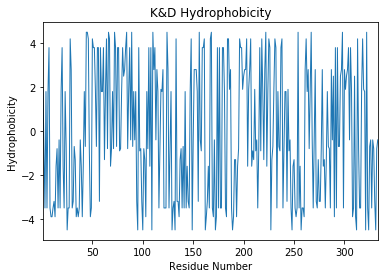

In [25]:
#Importar gráfico desde pylab
from pylab import *
#Importar desde Bio SeqIO
from Bio import SeqIO
#Definición de la variable prot como en el imput anterior.
prot = input("\033[1mPor favor, introduzca su secuencia de aminoácidos abajo:\n\x1b[0m")
if prot != '':
    prot_seq = prot
#Variable que en la que se aplica la función len; Es decir, el nº de residuos es igual a la longitud de la secuencia.   
num_residues = len(prot_seq)
#Establecimiento del diccionario con los valores de hidrofobicidad para cada aminoácido.
kd = { 'A': 1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C': 2.5,
       'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I': 4.5,
       'L': 3.8,'K':-3.9,'M': 1.9,'F': 2.8,'P':-1.6,
       'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V': 4.2 }
values = []
#Bucle para aplicar a cada aminoácido de la secuencia los valores del diccionario.
for residue in prot_seq:
 values.append(kd[residue])
#Valores del eje x
x_data = range(1, num_residues+1)
#Valores del gráfico.
plot(x_data, values, linewidth=1.0)
#Valor mínimo y máximo.
axis(xmin = 1, xmax = num_residues)
#Leyenda de los ejes y títulos.
xlabel("Residue Number")
ylabel("Hydrophobicity")
title("K&D Hydrophobicity")
show()